In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/listings.csv')

# Check basic info
df.info()

# Show first rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17238 entries, 0 to 17237
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17238 non-null  int64  
 1   listing_url                                   17238 non-null  object 
 2   scrape_id                                     17238 non-null  int64  
 3   last_scraped                                  17238 non-null  object 
 4   source                                        17238 non-null  object 
 5   name                                          17238 non-null  object 
 6   description                                   16910 non-null  object 
 7   neighborhood_overview                         9367 non-null   object 
 8   picture_url                                   17238 non-null  object 
 9   host_id                                       17238 non-null 

/tmp/ipykernel_66900/2952879446.py:6: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/listings.csv')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,57818,https://www.airbnb.com/rooms/57818,20250319035106,2025-03-21,city scrape,50% OFF Monthly 32+days! Snowbird! Walk to be...,32 + days stay ONLY with a 50% DISCOUNT. Book ...,Check-in window<br />After 3:00 PM<br />Edit<b...,https://a0.muscache.com/pictures/miso/Hosting-...,275948,...,4.97,4.88,4.70,NaN,f,2,2,0,0,0.40
1,69824,https://www.airbnb.com/rooms/69824,20250319035106,2025-03-21,city scrape,2 bd/2ba Oceanfront Condo,NaN,NaN,https://a0.muscache.com/pictures/443102/f6b94e...,351303,...,4.75,5.00,4.50,NaN,f,2,2,0,0,0.08
2,83449,https://www.airbnb.com/rooms/83449,20250319035106,2025-03-20,city scrape,2 miles from the beach 2/1 sleeps 5 #204,Mary Pop Apartments offers a 2-bedroom suite c...,"Residential neighborhood, less than 2 miles to...",https://a0.muscache.com/pictures/8c21bda0-5194...,454736,...,4.91,4.82,4.88,NaN,f,16,16,0,0,0.21
3,129099,https://www.airbnb.com/rooms/129099,20250319035106,2025-03-21,city scrape,MIAMI - AMAZING APARTMENT OCEANVIEW,Modern oceanview apartment over the beach<br /...,NaN,https://a0.muscache.com/pictures/828393/baabb6...,637272,...,4.35,4.56,4.12,NaN,f,5,5,0,0,0.17
4,191160,https://www.airbnb.com/rooms/191160,20250319035106,2025-03-19,city scrape,Tropical Beach Paradise Awaits You,Imagine being one block from the ocean in an a...,NaN,https://a0.muscache.com/pictures/1251401/83004...,924482,...,4.87,4.87,4.43,NaN,f,1,1,0,0,0.16


In [15]:
# Remove $ and commas in 'price' and convert to float
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Check for nulls
df.isnull().sum().sort_values(ascending=False).head(10)

# Drop columns with too many missing values
df = df.drop(columns=['license', 'neighbourhood_group_cleansed'], errors='ignore')

# Fill or drop remaining nulls
df = df.dropna(subset=['price', 'room_type', 'neighbourhood_cleansed'])

# Optional: filter out crazy prices
df = df[df['price'] < 1000]


In [16]:
# Save cleaned data to a new CSV file
df.to_csv('../data/cleaned_listings.csv', index=False)


In [17]:
# Function to clean Airbnb data
# This function reads the CSV file, cleans the 'price' column, drops unnecessary columns,
# and filters out rows with missing values or unrealistic prices.
# It returns a cleaned DataFrame ready for analysis.

def clean_airbnb_data(filepath):
    df = pd.read_csv(filepath, low_memory=False)
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
    df = df.drop(columns=['license', 'neighbourhood_group_cleansed'], errors='ignore')
    df = df.dropna(subset=['price', 'room_type', 'neighbourhood_cleansed'])
    df = df[df['price'] < 1000]
    return df


df = clean_airbnb_data("../data/listings.csv")
df.to_csv("../data/cleaned_listings.csv", index=False)


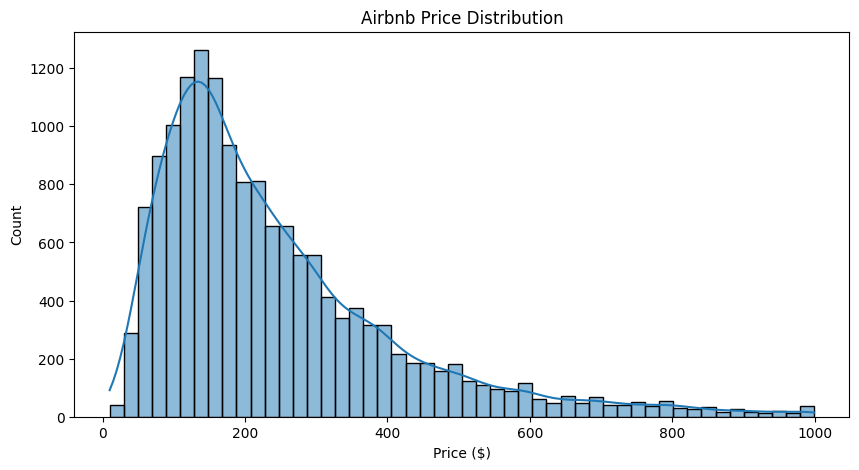

In [18]:
#Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Airbnb Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


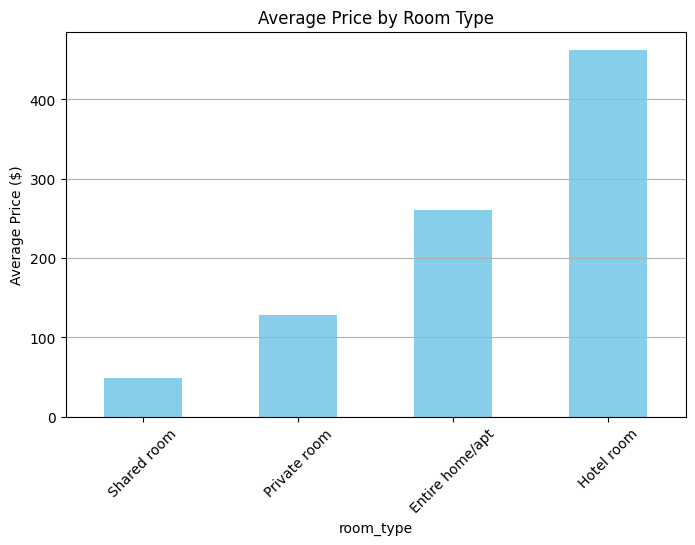

In [19]:
# Average Price by Room Type
room_prices = df.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(8, 5))
room_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


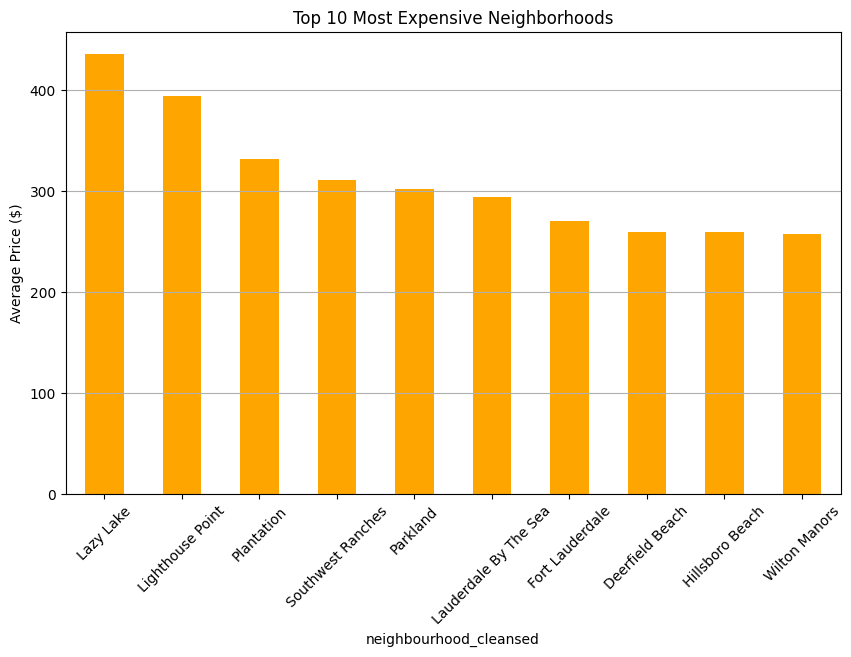

In [20]:
# Top 10 Most Expensive Neighborhoods
top_hoods = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_hoods.plot(kind='bar', color='orange')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


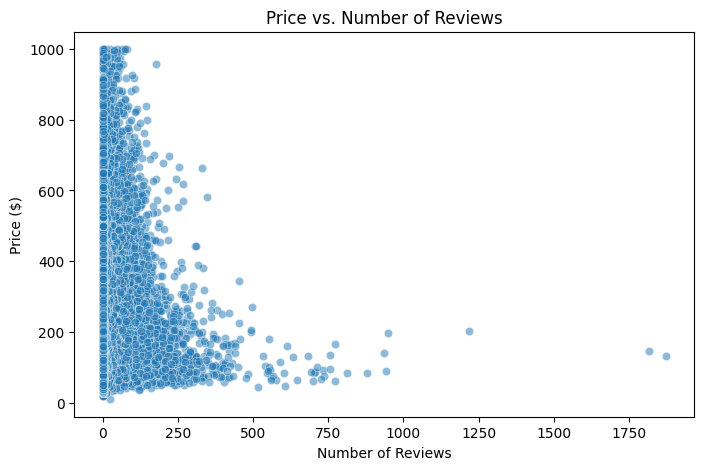

In [21]:
# Scatter plot of Price vs. Number of Reviews
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()


In [22]:
# Linear Regression Model to Predict Price

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
df_model = df[features + ['price']].dropna()

# Split data
X = df_model[features]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"RMSE: ${rmse:.2f}")


RMSE: $129.00


In [23]:
# Install nbformat if missing
import plotly.express as px

fig = px.histogram(df, x='price', nbins=50, title='Airbnb Price Distribution')
fig.update_layout(xaxis_title='Price ($)', yaxis_title='Count')
fig.show()

In [24]:
# Average Price by Room Type
room_prices = df.groupby('room_type')['price'].mean().reset_index()

fig = px.bar(room_prices, x='room_type', y='price',
             title='Average Price by Room Type',
             color='room_type',
             labels={'price': 'Average Price ($)', 'room_type': 'Room Type'})
fig.show()


In [25]:
# Top 10 Most Expensive Neighborhoods
top_hoods = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_hoods, x='neighbourhood_cleansed', y='price',
             title='Top 10 Most Expensive Neighborhoods',
             color='neighbourhood_cleansed',
             labels={'neighbourhood_cleansed': 'Neighborhood', 'price': 'Avg Price ($)'})
fig.show()


In [26]:
# Scatter plot of Price vs. Number of Reviews
fig = px.scatter(df, x='number_of_reviews', y='price',
                 title='Price vs. Number of Reviews',
                 labels={'number_of_reviews': 'Number of Reviews', 'price': 'Price ($)'},
                 hover_data=['name', 'room_type', 'neighbourhood_cleansed'])
fig.show()


In [27]:
import os

# Ensure the output directory exists
os.makedirs("output", exist_ok=True)

# Save the price distribution plot as an HTML file
fig.write_html("output/price_distribution.html")